In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df['stabf'].replace(to_replace=['unstable', 'stable'], value=[0, 1], inplace=True, limit=None, regex=False, method='pad')
df.drop('stab', inplace=True, axis=1)

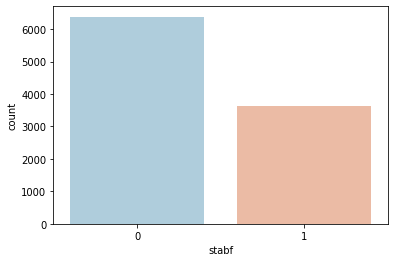

In [5]:
sns.countplot(df['stabf'], palette='RdBu_r')

In [6]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [7]:
df.shape

(10000, 13)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
X = df.drop('stabf', axis=1)
y = df['stabf']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
!pip install xgboost

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#import xgboost
import lightgbm

# Standardize the train and test sets
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [27]:
# Train a random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
predictions = rf_model.predict(x_test_scaled)

In [29]:
confusion_matrix(y_test, predictions)

array([[1223,   65],
       [ 101,  611]], dtype=int64)

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1288
           1       0.90      0.86      0.88       712

    accuracy                           0.92      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [31]:
# Train an extra trees classifier
et_model = ExtraTreesClassifier()
et_model.fit(x_train_scaled, y_train)



ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [32]:
etpredictions = et_model.predict(x_test_scaled)

In [33]:
confusion_matrix(y_test, etpredictions)

array([[1256,   32],
       [ 113,  599]], dtype=int64)

In [34]:
print(classification_report(y_test, etpredictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1288
           1       0.95      0.84      0.89       712

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
# Train an extreme boosting model using XGBoost
xgb_model = xgboost.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)


In [36]:
# Train a light gradient boosting model using LightGBM
lgb_model = lightgbm.LGBMClassifier()
lgb_model.fit(x_train_scaled, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
lgbpredictions = lgb_model.predict(x_test_scaled)

In [39]:
confusion_matrix(y_test, lgbpredictions)

array([[1238,   50],
       [  71,  641]], dtype=int64)

In [40]:
print(classification_report(y_test, lgbpredictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1288
           1       0.93      0.90      0.91       712

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1288
           1       0.74      0.69      0.71       712

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



In [42]:
confusion_matrix(y_test, predictions)

array([[1113,  175],
       [ 219,  493]], dtype=int64)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dmodel = DecisionTreeClassifier()

In [45]:
dmodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
dpredictions = dmodel.predict(X_test)

In [47]:
print(classification_report(y_test, dpredictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1288
           1       0.80      0.80      0.80       712

    accuracy                           0.86      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.86      0.86      0.86      2000



In [48]:
confusion_matrix(y_test, dpredictions)

array([[1143,  145],
       [ 144,  568]], dtype=int64)

In [41]:
scaler.fit(df.drop('stabf', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_features = scaler.transform(df.drop('stabf', axis=1))

In [43]:
df_feats = pd.DataFrame(scaled_features, columns= df.columns[1:])

In [44]:
df_feats.head()

,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063


In [45]:
X = df_feats
y = df['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
kmodel = KNeighborsClassifier(n_neighbors=1)

In [48]:
kmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
kpredictions = kmodel.predict(X_test)

In [50]:
print(classification_report(y_test, kpredictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1903
           1       0.77      0.70      0.73      1097

    accuracy                           0.81      3000
   macro avg       0.80      0.79      0.79      3000
weighted avg       0.81      0.81      0.81      3000



In [51]:
confusion_matrix(y_test, kpredictions)

array([[1667,  236],
       [ 326,  771]], dtype=int64)

In [52]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

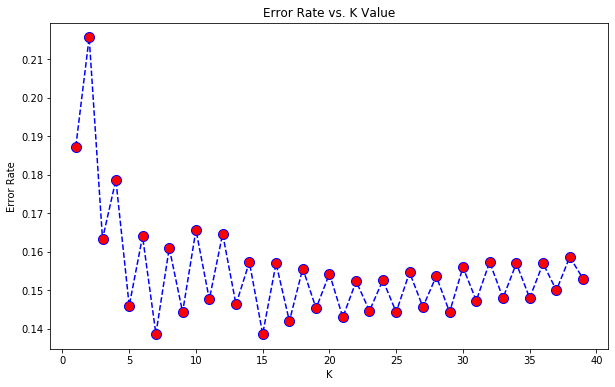

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1808   95]
 [ 321  776]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1903
           1       0.89      0.71      0.79      1097

    accuracy                           0.86      3000
   macro avg       0.87      0.83      0.84      3000
weighted avg       0.86      0.86      0.86      3000

